In [4]:
install.packages('openxlsx')
library(tidyverse)
library(openxlsx)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Chargement des données

In [5]:
data <- as_tibble(read.xlsx('preprocessed.xlsx'))

In [6]:
head(data)

Nom.plante,Hauteur,Nbr.taille,Poids.frais,Poids.sec,I
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
2,68.625,7.25,14.250,2.76650,FALSE
5,75.375,3.25,11.250,2.30675,FALSE
8,88.750,4.50,16.000,3.40350,FALSE
9,79.500,3.75,9.875,1.90725,FALSE
13,83.375,4.00,14.250,2.94650,FALSE
16,90.875,4.50,16.125,3.44700,FALSE


In [7]:
colnames(data)

[1] "Nom.plante"  "Hauteur"     "Nbr.taille"  "Poids.frais" "Poids.sec"  
[6] "I"

# Analyse des distributions

## Hauteurs

**Est-ce que l'inoculation a un effet ?**
   * Distribution normale?
   * Homogénéité des variances?

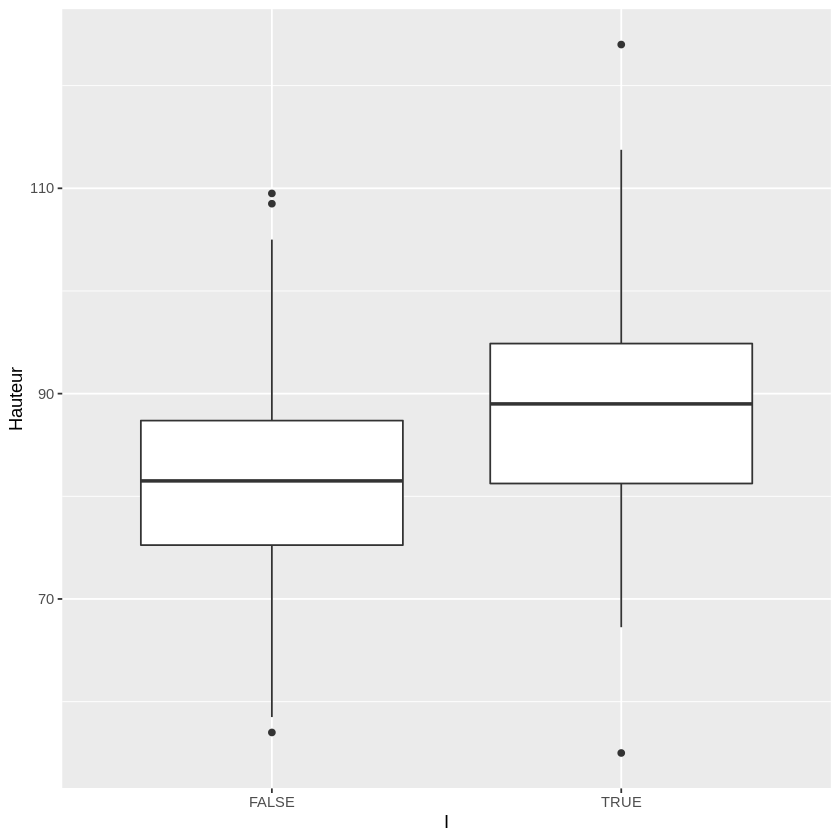

In [8]:
ggplot(data) + geom_boxplot(aes(y= Hauteur, x=I))

Il semble que les moyennes soit différentes en fonction de l'inoculation

### Test de normalité

H$_0$ l'échantillon provient d'une distribution normale

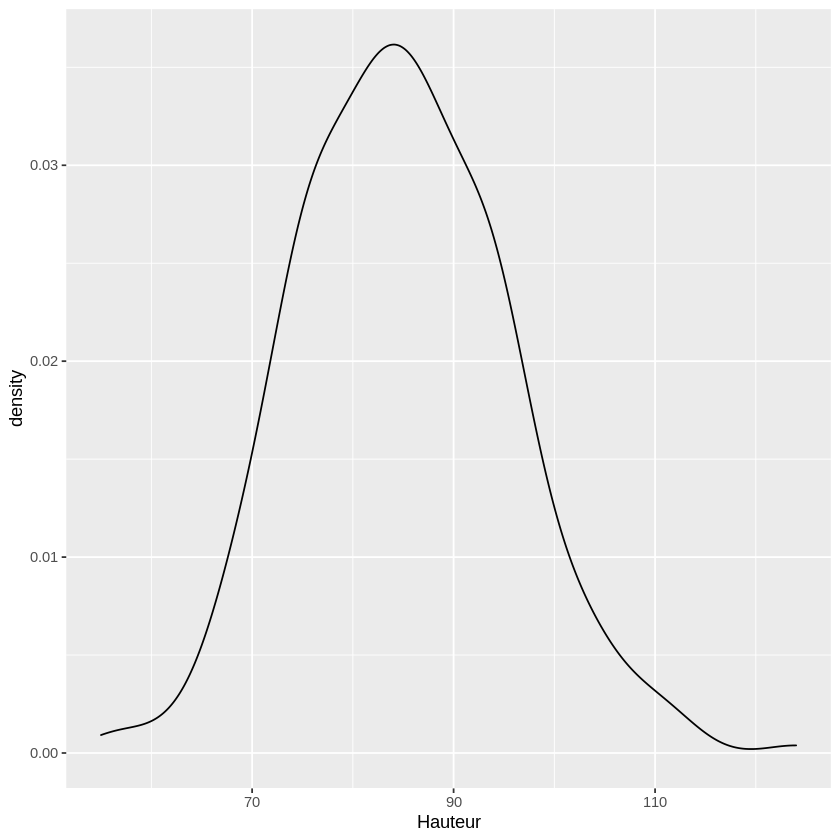

In [9]:
ggplot(data) + geom_density(kernel='gaussian', aes(x=Hauteur))

In [10]:
shapiro.test(data$Hauteur)


	Shapiro-Wilk normality test

data:  data$Hauteur
W = 0.99524, p-value = 0.3513


p-value > $\alpha$ (0,05) $\rightarrow$ H$_0$ ne peut pas être rejeté

La distribution semble issue d'une distribution normale

### Homogénéité des variances

H$_0$ : $\sigma_1$ = $\sigma_2$

H$_a$ : $\sigma_1$ $\ne$$\sigma_2$

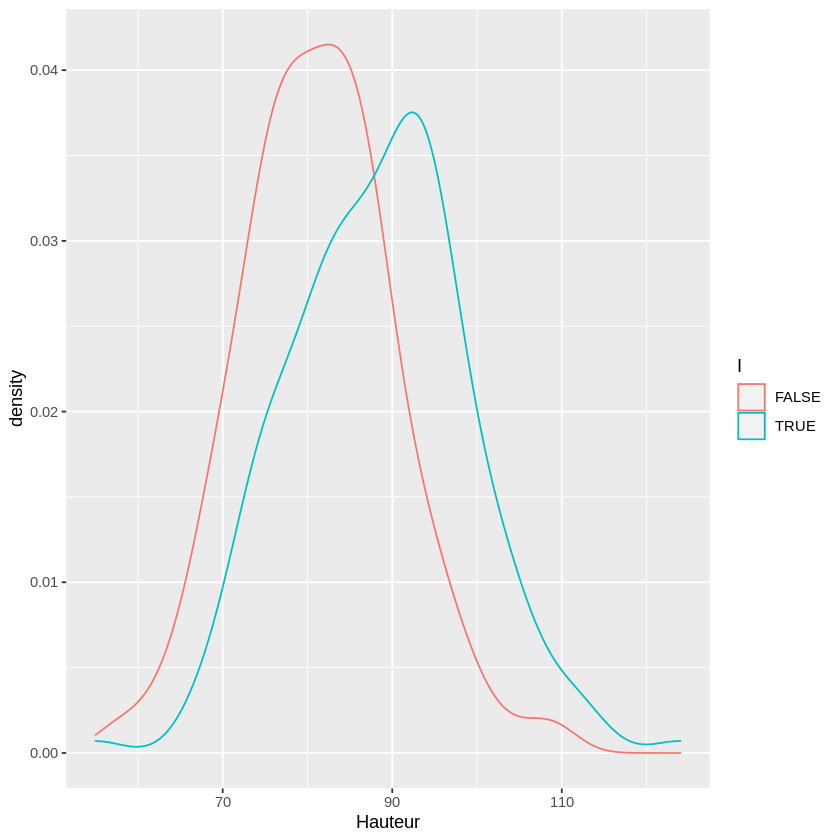

In [11]:
ggplot(data, aes(x=Hauteur, color=I)) + geom_density(kernel='gaussian')

In [12]:
bartlett.test(Hauteur ~ I, data=data)


	Bartlett test of homogeneity of variances

data:  Hauteur by I
Bartlett's K-squared = 3.3336, df = 1, p-value = 0.06788


### Les moyennes sont-elles différentes?

H$_0$ $\mu_1$ = $\mu_2$

H$_a$ $\mu_1$ $\ne$$\mu_2$

In [16]:
kruskal.test(Hauteur ~ I, data=data)


	Kruskal-Wallis rank sum test

data:  Hauteur by I
Kruskal-Wallis chi-squared = 42.148, df = 1, p-value = 8.46e-11


## Poids sec

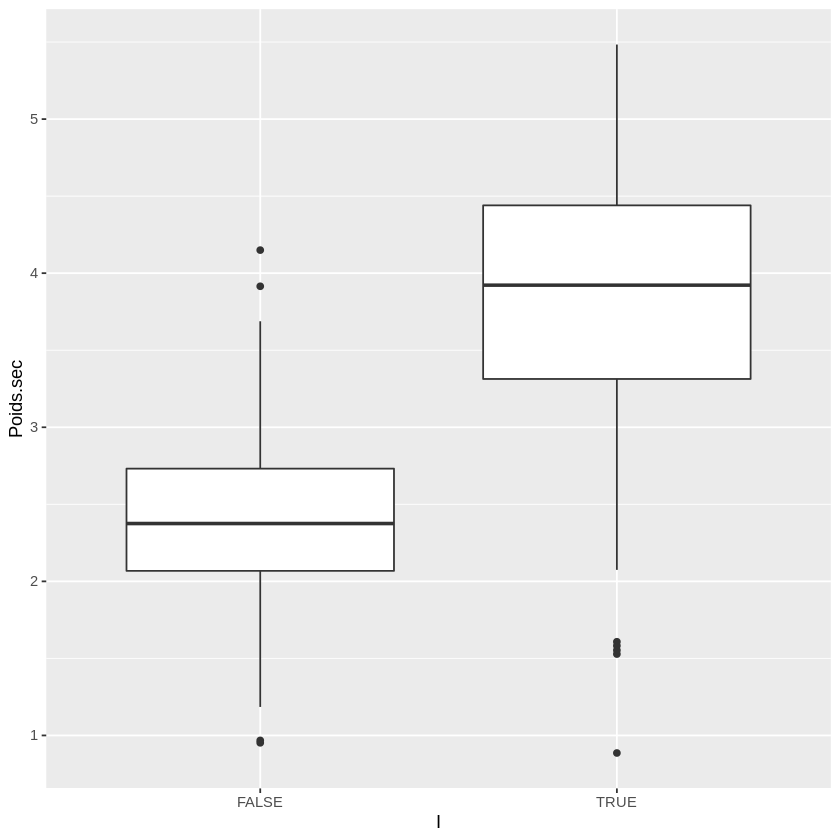

In [17]:
ggplot(data) + geom_boxplot(aes(y= Poids.sec, x=I))

Les distributions semblent contenir des outliers

In [18]:
I = data[ which(data$I == TRUE), ]
NI = data[ which(data$I == FALSE), ]

In [19]:
Q_I <- quantile(I$Poids.sec, probs=c(.25, .75))
Q_I

25%      75% 
3.313333 4.440000

In [20]:
iqr_I <- IQR(I$Poids.sec)
iqr_I

[1] 1.126667

In [21]:
up_I = Q_I[2] + 1.5 * iqr_I
low_I = Q_I[1] - 1.5 * iqr_I
up_I
low_I

75% 
6.13

25% 
1.623333

In [22]:
Q_NI <- quantile(NI$Poids.sec, probs=c(.25, .75))
Q_NI

25%    75% 
2.0680 2.7315

In [23]:
iqr_NI <- IQR(NI$Poids.sec)
iqr_NI

[1] 0.6635

In [24]:
up_NI = Q_NI[2] + 1.5 * iqr_NI
low_NI = Q_NI[1] - 1.5 * iqr_NI
up_NI
low_NI

75% 
3.72675

25% 
1.07275

In [25]:
I_NO <- subset(I, Poids.sec > low_I & Poids.sec < up_I)

In [26]:
NI_NO <- subset(NI, Poids.sec > low_NI & Poids.sec < up_NI)

In [27]:
data_NO <- rbind(NI_NO, I_NO)

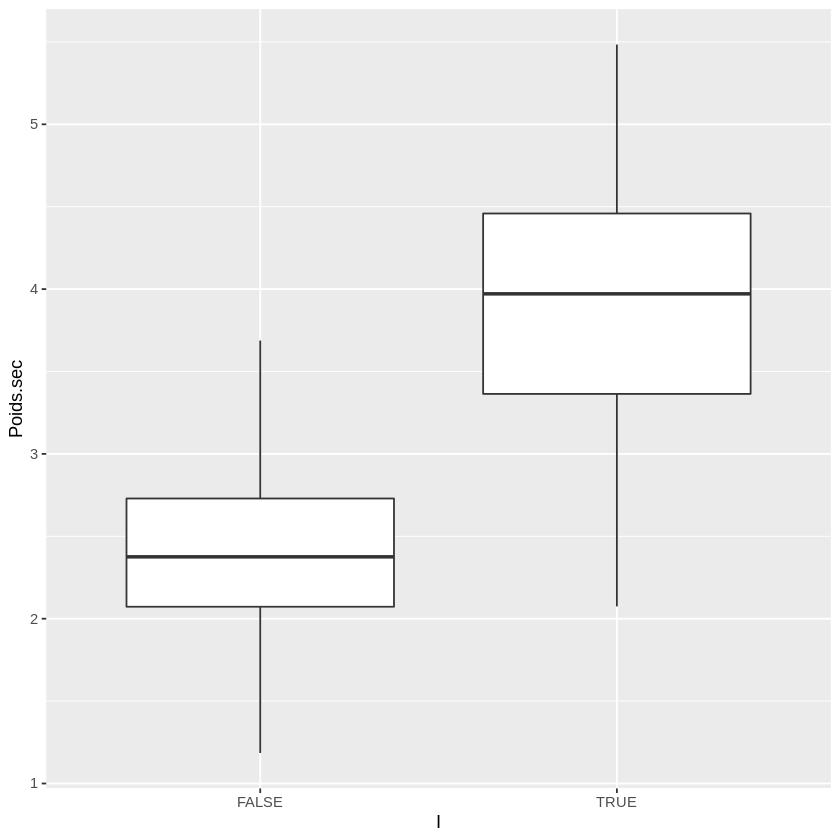

In [28]:
ggplot(data_NO) + geom_boxplot(aes(y= Poids.sec, x=I))

### Test de normalité

H$_0$ l'échantillon provient d'une distribution normale

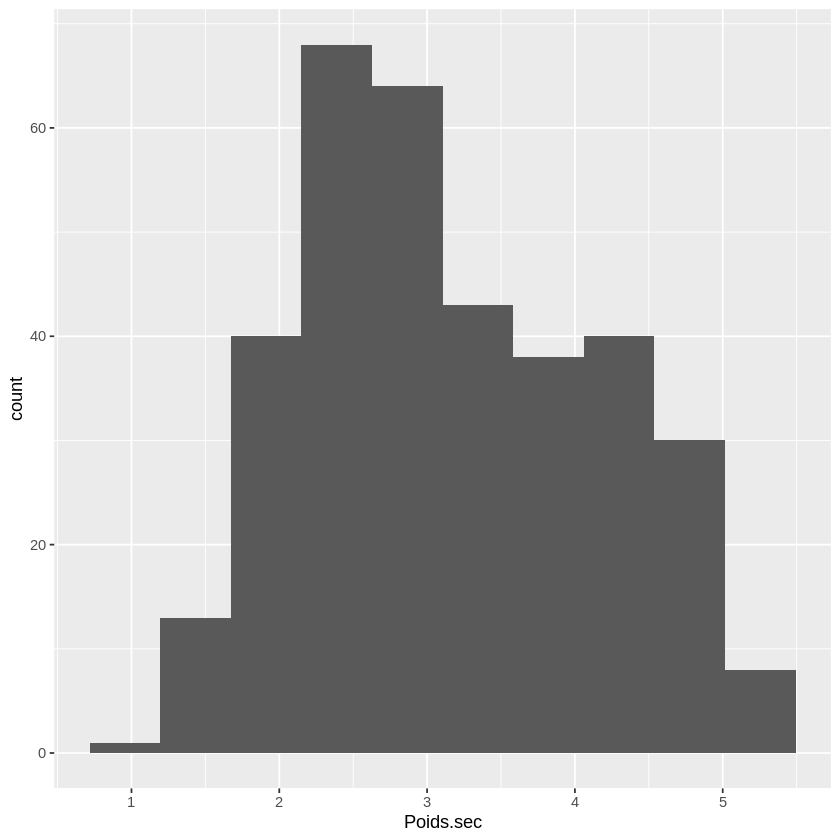

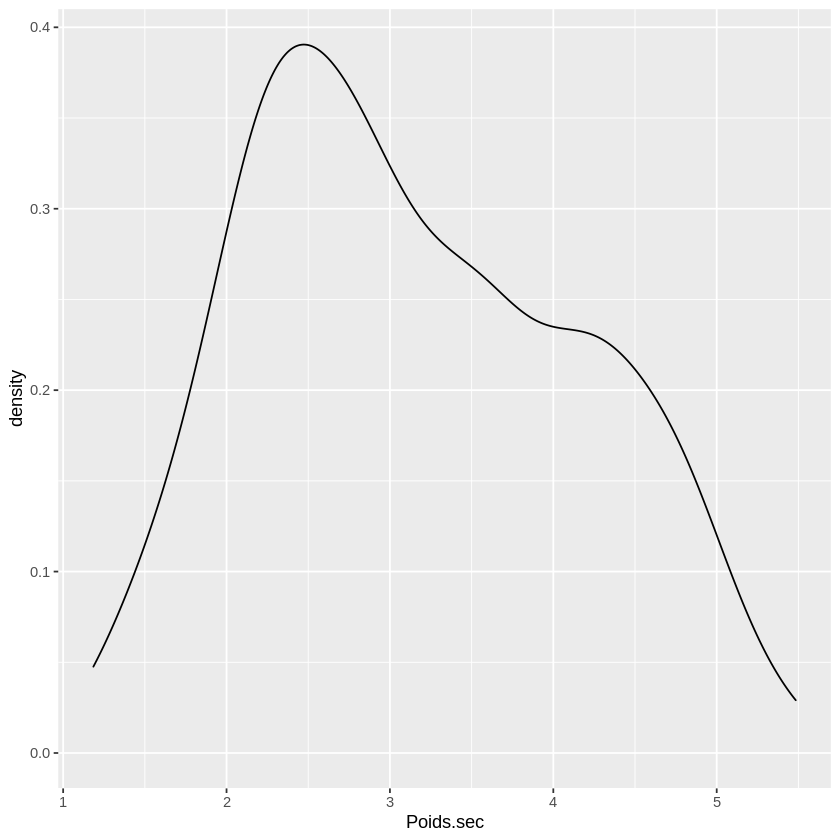

In [49]:
ggplot(data_NO) + geom_histogram(aes(x = Poids.sec), bins = 10) 
ggplot(data_NO) + geom_density(kernel='gaussian', aes(x=Poids.sec))

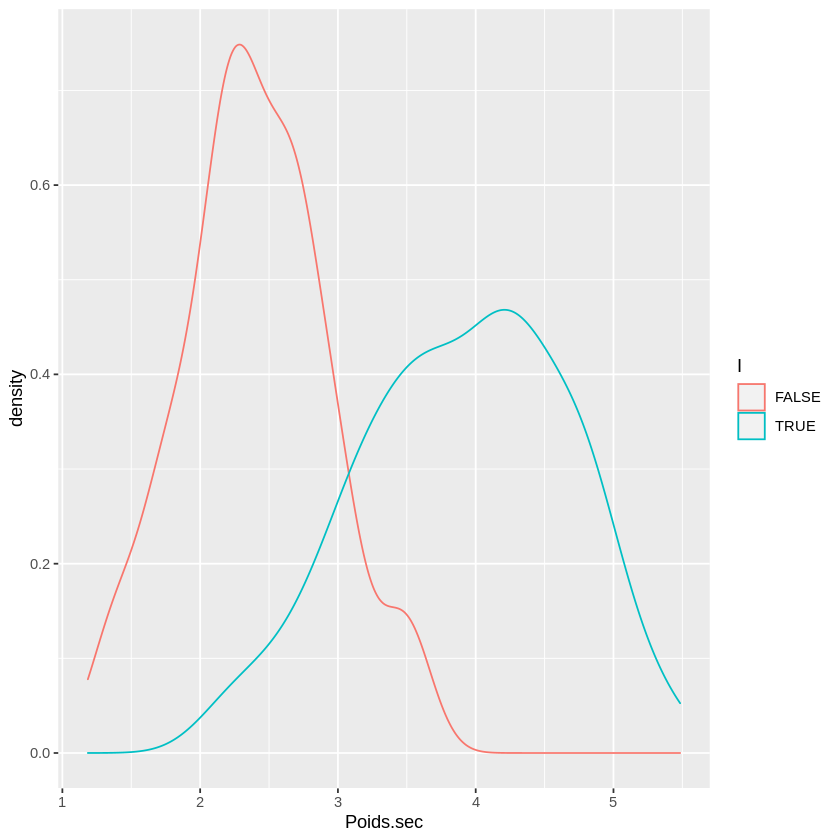

In [30]:
ggplot(data_NO, aes(x=Poids.sec, color=I)) + geom_density(kernel='gaussian')

In [31]:
shapiro.test(data_NO$Poids.sec)


	Shapiro-Wilk normality test

data:  data_NO$Poids.sec
W = 0.97075, p-value = 1.944e-06


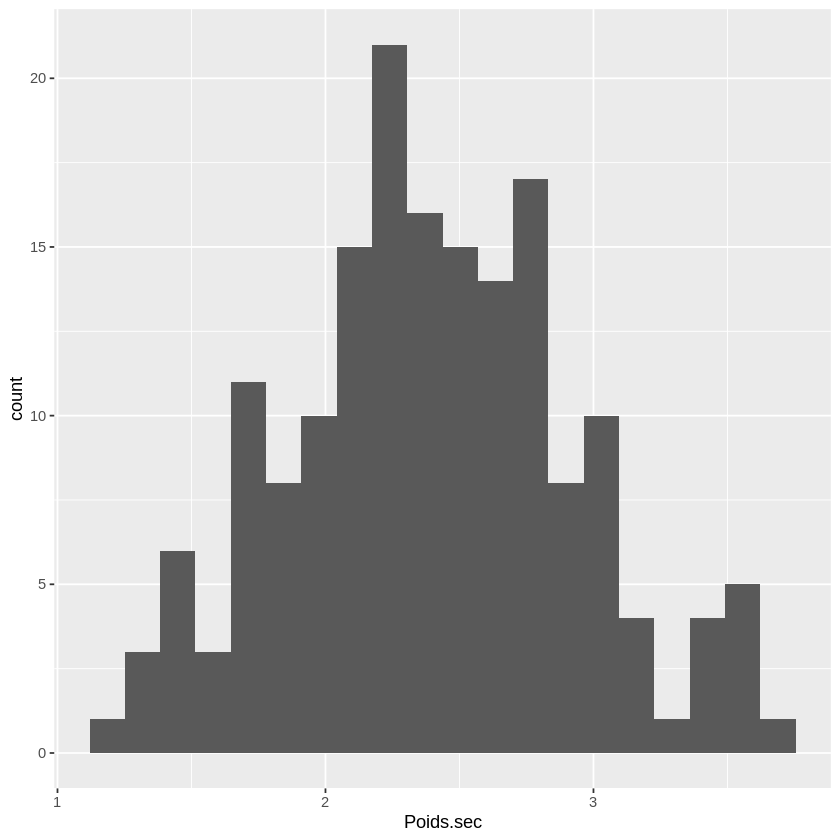

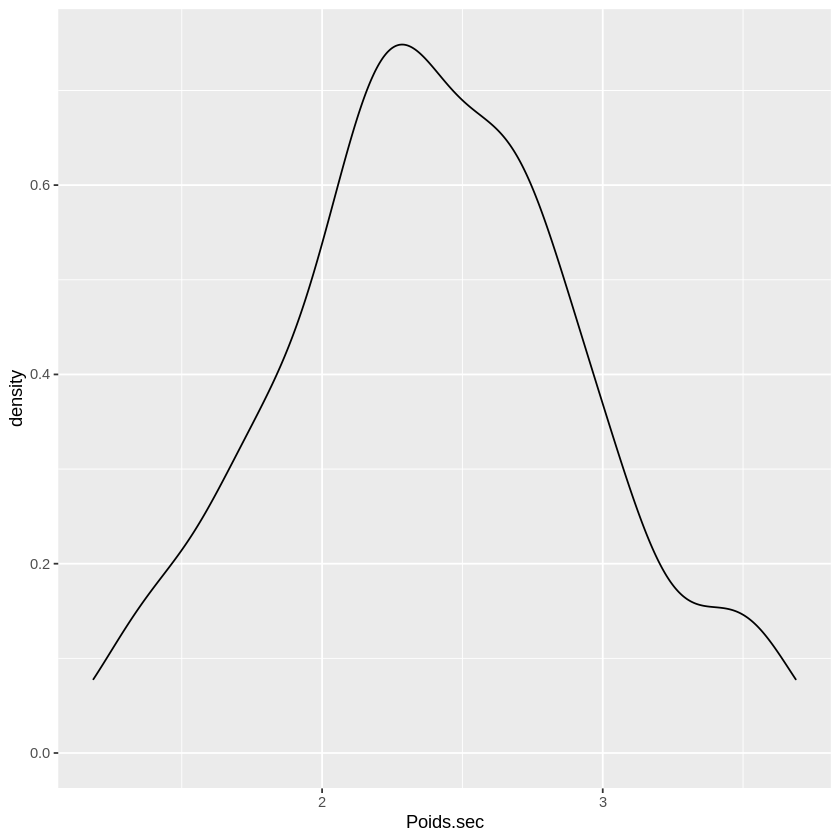

In [51]:
ggplot(NI_NO) + geom_histogram(aes(x = Poids.sec), bins=20) 
ggplot(NI_NO) + geom_density(kernel='gaussian', aes(x = Poids.sec)) 

In [33]:
shapiro.test(NI_NO$Poids.sec)


	Shapiro-Wilk normality test

data:  NI_NO$Poids.sec
W = 0.99188, p-value = 0.4405


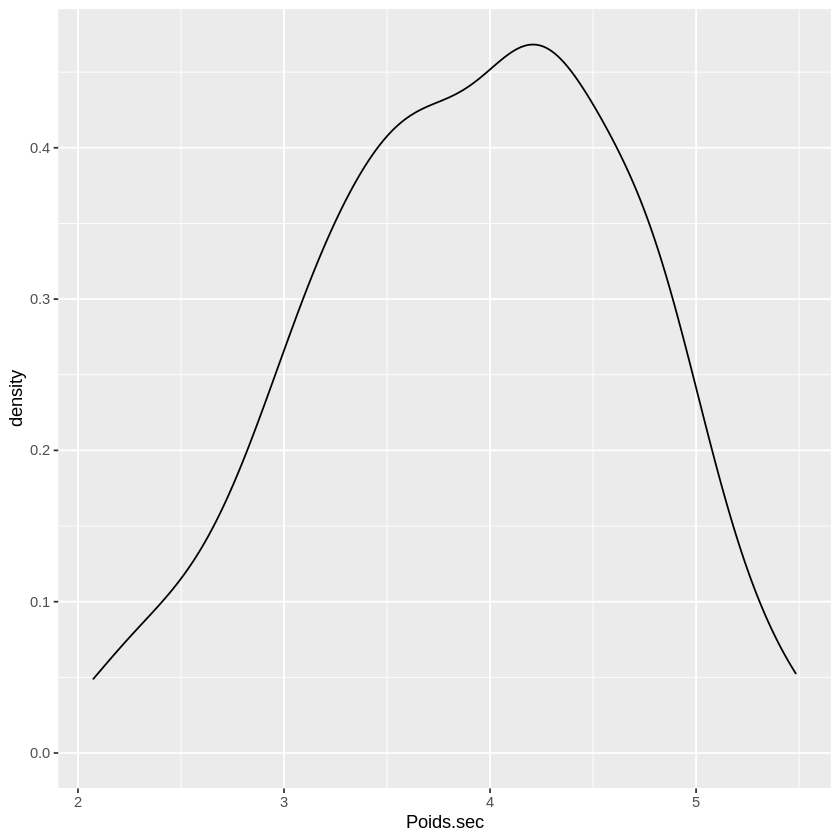

In [34]:
ggplot(I_NO) + geom_density(kernel='gaussian', aes(x = Poids.sec))

In [35]:
shapiro.test(I_NO$Poids.sec)


	Shapiro-Wilk normality test

data:  I_NO$Poids.sec
W = 0.98629, p-value = 0.091


### Homogénéité des variances (homoscédasticité)

In [40]:
bartlett.test(Poids.sec ~ I, data=data_NO)


	Bartlett test of homogeneity of variances

data:  Poids.sec by I
Bartlett's K-squared = 19.659, df = 1, p-value = 9.254e-06


### Les moyennes sont-elles différentes?

In [41]:
kruskal.test(Poids.sec ~ I, data=data_NO)


	Kruskal-Wallis rank sum test

data:  Poids.sec by I
Kruskal-Wallis chi-squared = 203.89, df = 1, p-value < 2.2e-16
